In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
pkl_file = open('gdrive/My Drive/FlightDelayPrediction/FlightData/JoinedData.pkl','rb')
df = pickle.load(pkl_file)
pkl_file.close()


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
df.dropna(how='any',inplace=True)
df.drop(columns=['FlightDate','date','Origin','ArrTime','ArrDelayMinutes','CRSArrTime','NearestDepTime'],inplace=True)
X = df.loc[:, df.columns != 'ArrDel15']
y = df.loc[:, df.columns == 'ArrDel15']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [7]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [8]:
ann_classifier = Sequential()
ann_classifier.add(Dense( units = 64, input_dim = X_train_res.shape[1], activation = 'relu'))
ann_classifier.add(Dense( units = 128, activation = 'relu'))
ann_classifier.add(Dense( units = 128, activation = 'relu'))
ann_classifier.add(Dense( units = 1, activation = 'sigmoid'))
ann_classifier.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
ann_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 26,305
Trainable params: 26,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
h1 = ann_classifier.fit(X_train_res,y_train_res,validation_data=(X_test,y_test),epochs = 7,batch_size = 128,verbose = 2)

Train on 2194874 samples, validate on 462779 samples
Epoch 1/7
2194874/2194874 - 46s - loss: 0.5027 - acc: 0.8137 - val_loss: 0.3663 - val_acc: 0.8948
Epoch 2/7
2194874/2194874 - 45s - loss: 0.3698 - acc: 0.8414 - val_loss: 0.3565 - val_acc: 0.8745
Epoch 3/7
2194874/2194874 - 45s - loss: 0.3622 - acc: 0.8451 - val_loss: 0.3015 - val_acc: 0.8963
Epoch 4/7
2194874/2194874 - 45s - loss: 0.3593 - acc: 0.8465 - val_loss: 0.2694 - val_acc: 0.9105
Epoch 5/7
2194874/2194874 - 44s - loss: 0.3587 - acc: 0.8468 - val_loss: 0.2906 - val_acc: 0.9026
Epoch 6/7
2194874/2194874 - 45s - loss: 0.3557 - acc: 0.8480 - val_loss: 0.3708 - val_acc: 0.8675
Epoch 7/7
2194874/2194874 - 44s - loss: 0.3556 - acc: 0.8479 - val_loss: 0.3692 - val_acc: 0.8741


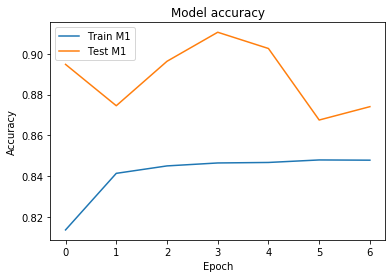

In [18]:
plt.plot(h1.history['acc'])
plt.plot(h1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train M1', 'Test M1'], loc='upper left')
plt.savefig('gdrive/My Drive/FlightDelayPrediction/ANNClassifierCharacteristics-V1.png')

In [0]:
y_pred = ann_classifier.predict_classes(X_test,batch_size=32)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92    365730
         1.0       0.66      0.81      0.73     97049

    accuracy                           0.87    462779
   macro avg       0.81      0.85      0.82    462779
weighted avg       0.89      0.87      0.88    462779

